Pobierz dane dotyczące scoringu kredytowego

*Pracujesz jako analityk danych w globalnej firmie finansowej. Przez lata firma gromadziła podstawowe dane bankowe i wiele informacji związanych z kredytami. Kierownictwo chce zbudować inteligentny system do segregowania ludzi w przedziałach oceny kredytowej, aby zmniejszyć wysiłek ręczny.*

**Zadanie na dziś: przygotować dane do modelu**

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer

import danych

In [2]:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "train.csv"

# Load the latest version
df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "parisrohan/credit-score-classification", file_path,
)

print("First 5 records:", df.head())

<ipython-input-2-db52f5663265>:9: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "parisrohan/credit-score-classification", file_path,


100%|██████████| 6.09M/6.09M [00:00<00:00, 42.3MB/s]

Extracting zip of train.csv...



/usr/local/lib/python3.11/dist-packages/kagglehub/pandas_datasets.py:91: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  result = read_function(


First 5 records:        ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utiliz

**Poznaj dane:**

1.   sprawdź wymiary i typy kolumn
2.   usuń duplikaty
3.   usuń zdbędne kolumny
4.   sprawdz liczbę braków danych w poszczególnych kolumnach






In [3]:
# 1. Sprawdź wymiary i typy kolumn
print("Wymiary danych:", df.shape)
print("\nTypy kolumn:")
print(df.dtypes)

# 2. Usuń duplikaty
df_no_duplicates = df.drop_duplicates()
print(f"\nLiczba usuniętych duplikatów: {len(df) - len(df_no_duplicates)}")
df = df_no_duplicates

# 3. Sprawdź liczbę braków danych w poszczególnych kolumnach
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({
    'Liczba braków': missing_values,
    'Procent braków': missing_percentage
})
print("\nBraki danych w kolumnach:")
print(missing_info[missing_info['Liczba braków'] > 0])

Wymiary danych: (100000, 28)

Typy kolumn:
ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance      

Usuń kolumny, które nie będą wykorzystywane w analizie ['ID','Customer_ID','SSN','Name']

In [14]:
# Usuń kolumny, które nie będą wykorzystywane w analizie
columns_to_drop = ['ID', 'Customer_ID', 'SSN', 'Name']
# Sprawdź, które kolumny faktycznie istnieją w DataFrame przed ich usunięciem
columns_to_drop = [col for col in columns_to_drop if col in df.columns]
if columns_to_drop:
    df = df.drop(columns=columns_to_drop)
    print(f"Usunięto kolumny: {columns_to_drop}")
else:
    print("Żadna z wymienionych kolumn nie istnieje w zbiorze danych")
print("Pozostałe kolumny:")
print(df.columns.tolist())

Żadna z wymienionych kolumn nie istnieje w zbiorze danych
Pozostałe kolumny:
['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score', 'Auto Loan', 'Credit Builder Loan', 'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan', 'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan', 'and Auto Loan', 'and Credit Builder Loan', 'and Debt Consolidation Loan', 'and Home Equity Loan', 'and Mortgage Loan', 'and Not Specified', 'and Payday Loan', 'and Personal Loan', 'and Student Loan', 'nan']


usuń niektore z zbędnych znakow ('_','-'), zmień puste komorki na nan

In [6]:
# Usuń zbędne znaki i zamień puste komórki na NaN
df = df.replace('', np.nan)

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype(str).str.replace('_', ' ').str.replace('-', ' ')

print("Dane po czyszczeniu:")
print(df.head(2))

Dane po czyszczeniu:
      Month Age Occupation Annual_Income  Monthly_Inhand_Salary  \
0   January  23  Scientist      19114.12            1824.843333   
1  February  23  Scientist      19114.12                    NaN   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate Num_of_Loan  \
0                  3                4              3           4   
1                  3                4              3           4   

                                        Type_of_Loan  ...  Credit_Mix  \
0  Auto Loan, Credit Builder Loan, Personal Loan,...  ...               
1  Auto Loan, Credit Builder Loan, Personal Loan,...  ...        Good   

  Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0           809.98                 26.82262  22 Years and 1 Months   
1           809.98                 31.94496                    nan   

  Payment_of_Min_Amount Total_EMI_per_month  Amount_invested_monthly  \
0                    No           49.574949        80.41529543900253 

Zmień nazwy miesiecy na zmienne liczbowe zgodnie z kolejnością miesięcy

In [7]:
# Zmień nazwy miesięcy na wartości liczbowe
month_mapping = {
    "January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6,
    "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12
}

# Zastosuj mapowanie do kolumn z nazwami miesięcy (jeśli takie istnieją)
if 'Month' in df.columns:
    df['Month'] = df['Month'].map(month_mapping)

# Sprawdź inne kolumny, które mogą zawierać nazwy miesięcy
for col in df.select_dtypes(include=['object']).columns:
    if df[col].astype(str).str.contains('January|February|March|April|May|June|July|August|September|October|November|December').any():
        print(f"Kolumna {col} może zawierać nazwy miesięcy")

print("Dane po konwersji miesięcy:")
print(df.head(2))

Dane po konwersji miesięcy:
   Month Age Occupation Annual_Income  Monthly_Inhand_Salary  \
0      1  23  Scientist      19114.12            1824.843333   
1      2  23  Scientist      19114.12                    NaN   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate Num_of_Loan  \
0                  3                4              3           4   
1                  3                4              3           4   

                                        Type_of_Loan  ...  Credit_Mix  \
0  Auto Loan, Credit Builder Loan, Personal Loan,...  ...               
1  Auto Loan, Credit Builder Loan, Personal Loan,...  ...        Good   

  Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0           809.98                 26.82262  22 Years and 1 Months   
1           809.98                 31.94496                    nan   

  Payment_of_Min_Amount Total_EMI_per_month  Amount_invested_monthly  \
0                    No           49.574949        80.41529543900253   

Zakoduj zmienne tekstowe: 'Occupation', 'Type_of_Loan', 'Payment_Behaviour', 'Credit_Mix', użyj LabelEncodera

In [8]:
# Zakodowanie zmiennych tekstowych: 'Occupation', 'Payment_Behaviour', 'Credit_Mix'
# Zauważ, że 'Type_of_Loan' jest już obsługiwany w dalszej części kodu przy użyciu MultiLabelBinarizer

label_columns = ['Occupation', 'Payment_Behaviour', 'Credit_Mix']
label_encoder = LabelEncoder()

for column in label_columns:
    if column in df.columns:
        # Zapisz brakujące wartości
        nulls = df[column].isnull()
        # Zakoduj tylko niepuste wartości
        df.loc[~nulls, column] = label_encoder.fit_transform(df.loc[~nulls, column])

print("Dane po zakodowaniu zmiennych tekstowych:")
print(df.head(2))

Dane po zakodowaniu zmiennych tekstowych:
   Month Age Occupation Annual_Income  Monthly_Inhand_Salary  \
0      1  23         13      19114.12            1824.843333   
1      2  23         13      19114.12                    NaN   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate Num_of_Loan  \
0                  3                4              3           4   
1                  3                4              3           4   

                                        Type_of_Loan  ...  Credit_Mix  \
0  Auto Loan, Credit Builder Loan, Personal Loan,...  ...           0   
1  Auto Loan, Credit Builder Loan, Personal Loan,...  ...           2   

  Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0           809.98                 26.82262  22 Years and 1 Months   
1           809.98                 31.94496                    nan   

  Payment_of_Min_Amount Total_EMI_per_month  Amount_invested_monthly  \
0                    No           49.574949        80.415

Przelicz kolumne Credit_History_Age na liczbę mięsiecy


In [15]:
# Przeliczenie kolumny Credit_History_Age na liczbę miesięcy
def extract_months(credit_age):
    if pd.isna(credit_age) or credit_age == 'nan':
        return np.nan

    credit_age = str(credit_age)
    years = 0
    months = 0

    if 'Years' in credit_age or 'Year' in credit_age:
        years_str = credit_age.split('Years')[0].split('Year')[0].strip()
        try:
            years = int(years_str)
        except:
            pass

    if 'Months' in credit_age or 'Month' in credit_age:
        months_part = credit_age.split('Years')[-1].split('Year')[-1].strip()
        months_str = months_part.split('Months')[0].split('Month')[0].strip()
        try:
            months = int(months_str)
        except:
            pass

    return years * 12 + months

if 'Credit_History_Age' in df.columns:
    df['Credit_History_Age'] = df['Credit_History_Age'].apply(extract_months)

print("Credit_History_Age po konwersji na miesiące:")
print(df['Credit_History_Age'].head())

Credit_History_Age po konwersji na miesiące:
0    0.0
1    NaN
2    0.0
3    0.0
4    0.0
Name: Credit_History_Age, dtype: float64


In [11]:
# Rozdzielanie wartości po przecinku i usuwanie zbędnych spacji
df['Type_of_Loan'] = df['Type_of_Loan'].str.split(', ')

# Użycie MultiLabelBinarizer do One-Hot Encoding
mlb = MultiLabelBinarizer()
encoded_df = pd.DataFrame(mlb.fit_transform(df['Type_of_Loan']), columns=mlb.classes_)

# Łączenie z oryginalnym DataFrame
df = df.join(encoded_df).drop(columns=['Type_of_Loan'])

print(df.head())

   Month   Age Occupation Annual_Income  Monthly_Inhand_Salary  \
0      1    23         13      19114.12            1824.843333   
1      2    23         13      19114.12                    NaN   
2      3   500         13      19114.12                    NaN   
3      4    23         13      19114.12                    NaN   
4      5    23         13      19114.12            1824.843333   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate Num_of_Loan  \
0                  3                4              3           4   
1                  3                4              3           4   
2                  3                4              3           4   
3                  3                4              3           4   
4                  3                4              3           4   

   Delay_from_due_date  ... and Auto Loan and Credit Builder Loan  \
0                    3  ...             0                       0   
1                   -1  ...             0               

Zmien inne zmienne na numeryczne

In [22]:
# Zmiana innych zmiennych na numeryczne
numeric_cols = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
                'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
                'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
                'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
                'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

for col in numeric_cols:
    if col in df.columns:
        # Próba konwersji na liczby
        df[col] = pd.to_numeric(df[col], errors='coerce')

print("Dane po konwersji na formaty numeryczne:")
print(df.dtypes)

Dane po konwersji na formaty numeryczne:
Month                            int64
Age                              int64
Occupation                      object
Annual_Income                  float64
Monthly_Inhand_Salary          float64
Num_Bank_Accounts                int64
Num_Credit_Card                  int64
Interest_Rate                    int64
Num_of_Loan                      int64
Delay_from_due_date              int64
Num_of_Delayed_Payment         float64
Changed_Credit_Limit           float64
Num_Credit_Inquiries           float64
Credit_Mix                      object
Outstanding_Debt               float64
Credit_Utilization_Ratio       float64
Credit_History_Age             float64
Payment_of_Min_Amount           object
Total_EMI_per_month            float64
Amount_invested_monthly        float64
Payment_Behaviour               object
Monthly_Balance                float64
Credit_Score                    object
Auto Loan                        int64
Credit Builder Loan    

Uzupełnij braki w kolumnie Monthly_Inhand_Salary,  Annual_Income, .. średnią

In [17]:
# Uzupełnienie braków średnią w wybranych kolumnach numerycznych
numeric_cols_to_fill = ['Monthly_Inhand_Salary', 'Annual_Income', 'Monthly_Balance',
                         'Credit_History_Age', 'Amount_invested_monthly', 'Outstanding_Debt']

for col in numeric_cols_to_fill:
    if col in df.columns:
        # Najpierw upewnij się, że kolumna jest numeryczna
        try:
            # Konwertuj na liczbowy format, ignorując błędy (zastępując je przez NaN)
            df[col] = pd.to_numeric(df[col], errors='coerce')
            # Teraz możemy bezpiecznie obliczyć średnią tylko dla wartości liczbowych
            mean_value = df[col].mean()
            # Zastąp braki danych obliczoną średnią
            df[col] = df[col].fillna(mean_value)
            print(f"Kolumna {col}: wypełniono braki średnią {mean_value:.2f}")
        except Exception as e:
            print(f"Nie udało się przetworzyć kolumny {col}: {str(e)}")

# Sprawdzenie pozostałych braków
remaining_nulls = df[numeric_cols_to_fill].isnull().sum()
print("\nPozostałe braki w uzupełnionych kolumnach:")
print(remaining_nulls)

Kolumna Monthly_Inhand_Salary: wypełniono braki średnią 4194.17
Kolumna Annual_Income: wypełniono braki średnią 176415.70
Kolumna Monthly_Balance: wypełniono braki średnią 30364372469635625254912.00
Kolumna Credit_History_Age: wypełniono braki średnią 0.00
Kolumna Amount_invested_monthly: wypełniono braki średnią 637.41
Kolumna Outstanding_Debt: wypełniono braki średnią 1426.22

Pozostałe braki w uzupełnionych kolumnach:
Monthly_Inhand_Salary      0
Annual_Income              0
Monthly_Balance            0
Credit_History_Age         0
Amount_invested_monthly    0
Outstanding_Debt           0
dtype: int64


Narysuj rozkłady zmiennych 'Annual_Income', 'Monthly_Balance'

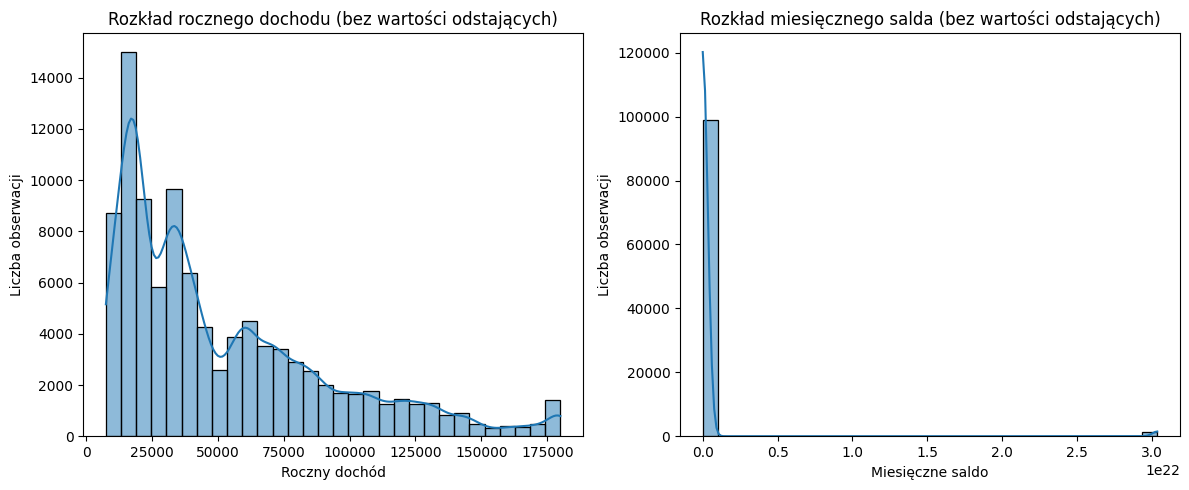

In [18]:
# Wizualizacja rozkładów 'Annual_Income' i 'Monthly_Balance'
plt.figure(figsize=(12, 5))

# Najpierw upewnij się, że dane są numeryczne
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce')
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')

# Usuń wartości odstające przed wizualizacją
def clip_outliers(series, percentile_low=0.01, percentile_high=0.99):
    """Przytnij wartości do zakresu między dolnym a górnym percentylem"""
    if series.count() > 0:
        low = series.quantile(percentile_low)
        high = series.quantile(percentile_high)
        return series.clip(low, high)
    return series

# Rozkład Annual_Income z ograniczonym zakresem
plt.subplot(1, 2, 1)
clipped_income = clip_outliers(df['Annual_Income'].dropna())
sns.histplot(clipped_income, kde=True, bins=30)
plt.title('Rozkład rocznego dochodu (bez wartości odstających)')
plt.xlabel('Roczny dochód')
plt.ylabel('Liczba obserwacji')

# Rozkład Monthly_Balance z ograniczonym zakresem
plt.subplot(1, 2, 2)
clipped_balance = clip_outliers(df['Monthly_Balance'].dropna())
sns.histplot(clipped_balance, kde=True, bins=30)
plt.title('Rozkład miesięcznego salda (bez wartości odstających)')
plt.xlabel('Miesięczne saldo')
plt.ylabel('Liczba obserwacji')

plt.tight_layout()
plt.show()

usuń wartości odstające (w przypadku wieku wszystkie ujemne i te powyzej 100 lat)

In [20]:
# Usunięcie wartości odstających
# Najpierw upewnij się, że kolumny są typu numerycznego
for col in ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Monthly_Balance']:
    if col in df.columns:
        # Konwertuj na typ numeryczny
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Dla wieku - usunięcie wartości ujemnych i powyżej 100 lat
if 'Age' in df.columns:
    age_mask = (df['Age'] >= 0) & (df['Age'] <= 100) & df['Age'].notna()
    df = df[age_mask]
    print(f"Liczba rekordów po usunięciu odstających wartości wieku: {len(df)}")

# Funkcja do usuwania wartości odstających metodą IQR
def remove_outliers_iqr(df, column):
    if column in df.columns:
        # Ignoruj wartości NaN
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Utwórz maskę dla wartości w zakresie
        mask = (df[column] >= lower_bound) & (df[column] <= upper_bound) & df[column].notna()
        filtered_df = df[mask]
        print(f"Kolumna {column}: usunięto {len(df) - len(filtered_df)} wartości odstających")
        return filtered_df
    return df

# Zastosowanie do wybranych kolumn
for col in ['Annual_Income', 'Monthly_Inhand_Salary', 'Monthly_Balance']:
    if col in df.columns:
        df = remove_outliers_iqr(df, col)
        print(f"Liczba rekordów po usunięciu odstających wartości dla {col}: {len(df)}")

Liczba rekordów po usunięciu odstających wartości wieku: 97224
Kolumna Annual_Income: usunięto 2699 wartości odstających
Liczba rekordów po usunięciu odstających wartości dla Annual_Income: 94525
Kolumna Monthly_Inhand_Salary: usunięto 3524 wartości odstających
Liczba rekordów po usunięciu odstających wartości dla Monthly_Inhand_Salary: 91001
Kolumna Monthly_Balance: usunięto 6557 wartości odstających
Liczba rekordów po usunięciu odstających wartości dla Monthly_Balance: 84444


Zwizualizuj korelacje między zmiennymi

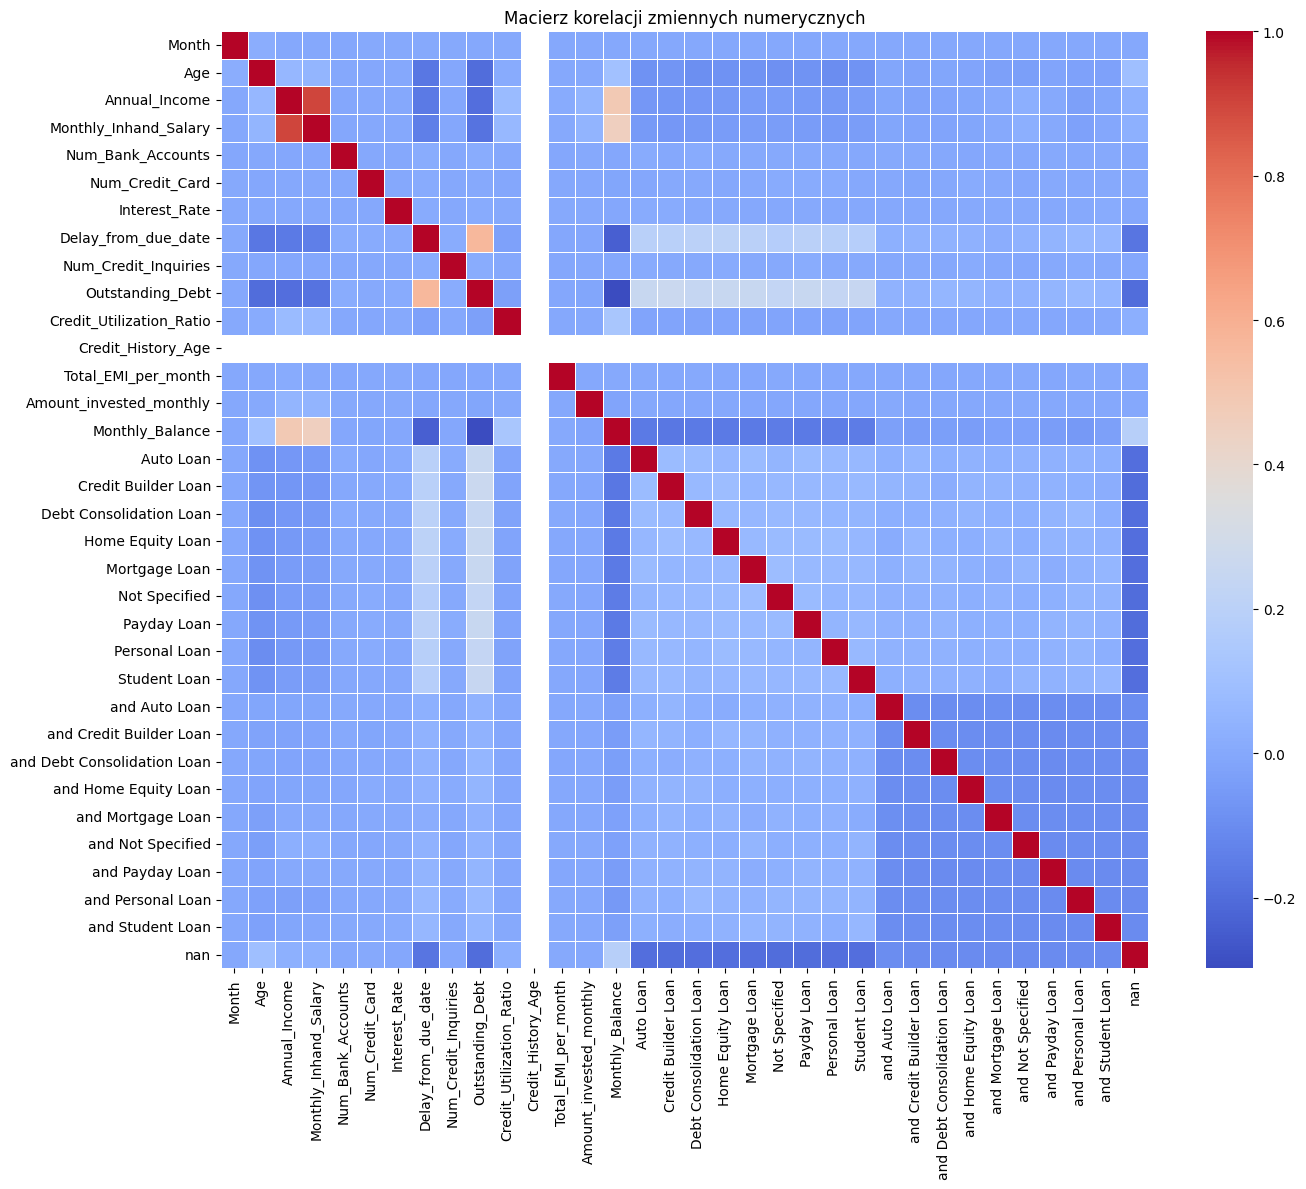

In [21]:
# Wizualizacja korelacji między zmiennymi
# Wybierz tylko kolumny numeryczne
numeric_df = df.select_dtypes(include=[np.number])

# Oblicz macierz korelacji
corr_matrix = numeric_df.corr()

# Wizualizacja jako heatmapa
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Macierz korelacji zmiennych numerycznych')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Dodatkowo wyświetl najwyższe korelacje z docelową zmienną (jeśli istnieje)
if 'Credit_Score' in numeric_df.columns:
    target_corr = corr_matrix['Credit_Score'].sort_values(ascending=False)
    print("Najważniejsze korelacje ze zmienną Credit_Score:")
    print(target_corr)